In [1]:
import os
print(os.getcwd())

C:\Users\shlee


In [2]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img = Image.open(r"archive\flowers\sunflower\6953297_8576bf4ea3.jpg")
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x350 at 0x2288D74FC70>


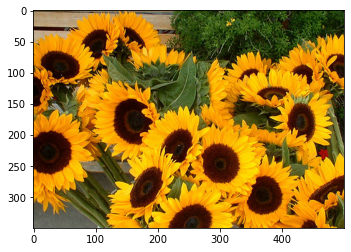

(350, 500, 3)
[[[117 100  56]
  [120 103  60]
  [125 105  68]
  ...
  [ 29  59  23]
  [ 11  36  14]
  [ 13  34  25]]

 [[ 70  54  18]
  [ 73  54  21]
  [ 72  53  23]
  ...
  [ 29  57  19]
  [ 11  37  12]
  [  8  30  18]]

 [[112  95  67]
  [112  95  69]
  [108  90  66]
  ...
  [ 23  49  10]
  [  7  31   5]
  [  0  16   0]]

 ...

 [[115 117 106]
  [113 115 104]
  [112 114 103]
  ...
  [ 71  67   4]
  [ 72  68   5]
  [ 72  71   7]]

 [[113 115 104]
  [110 112 101]
  [109 111 100]
  ...
  [ 70  66   3]
  [ 72  68   5]
  [ 71  70   6]]

 [[110 112 101]
  [107 109  98]
  [106 108  97]
  ...
  [ 68  64   1]
  [ 70  66   3]
  [ 69  68   4]]]


In [4]:
plt.imshow(img)
plt.show()

img_array = np.array(img)
print(img_array.shape)
print(img_array)

<PIL.Image.Image image mode=RGB size=100x100 at 0x228961EE1C0>


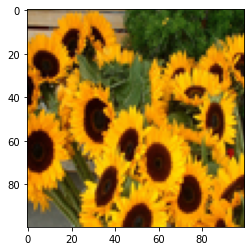

(100, 100, 3)


In [5]:
resized = img.resize([100, 100])

print(resized)
plt.imshow(resized)
plt.show()

resized_array = np.array(resized)
print(resized_array.shape)

In [6]:
path = 'archive/flowers/'
filenames = os.listdir(path)
print("filenames: ", filenames)

filenames:  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [7]:
def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

In [8]:
target_names = list_dir(path = path)
print("target_names : ", target_names)

target_names :  ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [9]:
for dx, dname in enumerate(target_names):
    print("dname: ", dname)
    
    subpath = path + dname
    print("subpath :", subpath)
    
    filenames = list_dir(path = subpath)
    print("filenames: \n", filenames[:3])

dname:  daisy
subpath : archive/flowers/daisy
filenames: 
 ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname:  dandelion
subpath : archive/flowers/dandelion
filenames: 
 ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname:  rose
subpath : archive/flowers/rose
filenames: 
 ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname:  sunflower
subpath : archive/flowers/sunflower
filenames: 
 ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname:  tulip
subpath : archive/flowers/tulip
filenames: 
 ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [10]:
imagepath = os.path.join(subpath, filenames[2])
print("imagepath: ", imagepath)

imagepath:  archive/flowers/tulip\10094731133_94a942463c.jpg


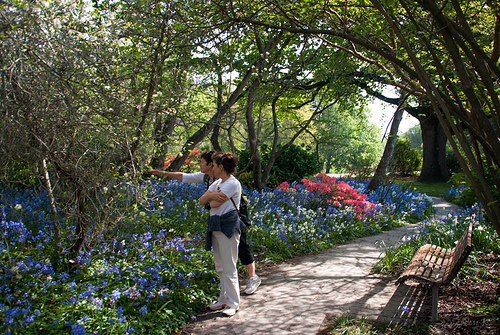

In [11]:
img = Image.open(imagepath)
img

In [12]:
resize = img.resize([100,100])
resize_np_array = np.array(resize)
print("resize_np_array.shape : \n", resize_np_array.shape)

resize_np_array.shape : 
 (100, 100, 3)


In [13]:
def load_image_pixels(imagepath, resolution):
    img = Image.open(imagepath)
    img_resize = img.resize(resolution)
    
    return np.array(img_resize)

In [14]:
resolution = [100,100]
pixels = load_image_pixels(imagepath = imagepath, resolution = resolution)

print("pixels: \n", pixels)

pixels: 
 [[[ 73  72  71]
  [113 118  98]
  [118 128  84]
  ...
  [ 40  38  22]
  [ 46  50  12]
  [ 67  72  26]]

 [[102 109  44]
  [ 98  97  83]
  [105 104  80]
  ...
  [ 93  85  85]
  [ 44  45   9]
  [ 60  66  23]]

 [[115 126  60]
  [145 149 152]
  [185 189 184]
  ...
  [150 154  97]
  [ 65  68  14]
  [ 51  57   9]]

 ...

 [[ 27  47  49]
  [ 32  46  25]
  [ 26  46  36]
  ...
  [ 61  50  46]
  [ 47  36  33]
  [ 24  17  13]]

 [[ 20  35  11]
  [ 63  59  54]
  [ 40  55  28]
  ...
  [ 43  33  32]
  [ 59  42  38]
  [ 33  21  18]]

 [[ 34  54  39]
  [ 28  52  98]
  [ 27  46  34]
  ...
  [ 60  53  42]
  [ 67  49  46]
  [ 23  16  15]]]


In [15]:
resolution = [100,100]

def flowers_init(resolution):
    path = 'archive/flowers/'
    target_names = list_dir(path)
    
    images = []
    idxs = []
    
    for dx, dname in enumerate(target_names):
        print("dname:", dname)
        subpath = path + dname
        print("subpath : ", subpath)
        
        filenames = list_dir(subpath)
        print("filenames :", filenames[:3])
        
        for fname in filenames:
            
            if fname[-4:] != '.jpg':
                continue
                
            imagepath = os.path.join(subpath, fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            idxs.append(dx)
            
    xs = np.asarray(images, dtype=np.float32)
    
    return xs, images, idxs

In [16]:
xs, images, idxs = flowers_init(resolution = resolution)

dname: daisy
subpath :  archive/flowers/daisy
filenames : ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname: dandelion
subpath :  archive/flowers/dandelion
filenames : ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname: rose
subpath :  archive/flowers/rose
filenames : ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname: sunflower
subpath :  archive/flowers/sunflower
filenames : ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname: tulip
subpath :  archive/flowers/tulip
filenames : ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [17]:
print(idxs)
print(xs.shape)
print(xs[0].shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [18]:
pd.DataFrame(idxs).value_counts

<bound method DataFrame.value_counts of       0
0     0
1     0
2     0
3     0
4     0
...  ..
4312  4
4313  4
4314  4
4315  4
4316  4

[4317 rows x 1 columns]>

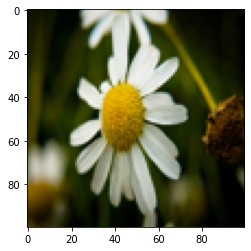

In [19]:
img = xs[11]

img_image = Image.fromarray(np.uint8(img))
plt.imshow(img_image)
plt.show()

In [20]:
img

array([[[ 6., 13.,  1.],
        [ 9., 16.,  1.],
        [12., 17.,  1.],
        ...,
        [15., 16.,  1.],
        [20., 20.,  3.],
        [29., 26.,  6.]],

       [[ 6., 13.,  1.],
        [10., 16.,  1.],
        [12., 18.,  2.],
        ...,
        [ 8., 11.,  1.],
        [12., 14.,  1.],
        [18., 18.,  2.]],

       [[ 6., 14.,  0.],
        [11., 17.,  1.],
        [12., 19.,  1.],
        ...,
        [ 3.,  5.,  0.],
        [ 3.,  4.,  1.],
        [ 5.,  6.,  1.]],

       ...,

       [[57., 45.,  0.],
        [56., 43.,  0.],
        [50., 36.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[63., 53.,  2.],
        [63., 51.,  4.],
        [59., 46.,  2.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[71., 60., 14.],
        [70., 57., 19.],
        [67., 57., 14.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [21]:
np.uint8(img)

array([[[ 6, 13,  1],
        [ 9, 16,  1],
        [12, 17,  1],
        ...,
        [15, 16,  1],
        [20, 20,  3],
        [29, 26,  6]],

       [[ 6, 13,  1],
        [10, 16,  1],
        [12, 18,  2],
        ...,
        [ 8, 11,  1],
        [12, 14,  1],
        [18, 18,  2]],

       [[ 6, 14,  0],
        [11, 17,  1],
        [12, 19,  1],
        ...,
        [ 3,  5,  0],
        [ 3,  4,  1],
        [ 5,  6,  1]],

       ...,

       [[57, 45,  0],
        [56, 43,  0],
        [50, 36,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[63, 53,  2],
        [63, 51,  4],
        [59, 46,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[71, 60, 14],
        [70, 57, 19],
        [67, 57, 14],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

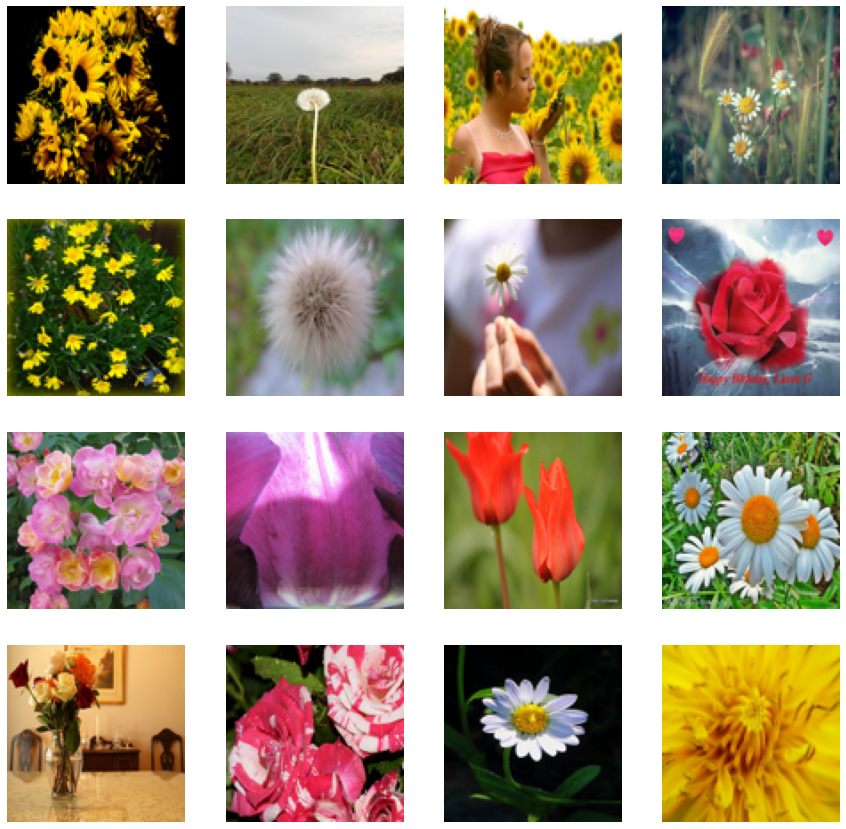

In [22]:
plt.figure(figsize=(15,15))

for i in range(16):
    plt.subplot(4,4,i+1)
    i = np.random.choice(4317)
    img = xs[i]
    img_image = Image.fromarray(np.uint8(img))
    plt.axis("off")
    plt.imshow(img_image)

plt.show()

In [23]:
def onehot(idxs, cnt):
    return np.eye(cnt)[idxs]

In [24]:
cnt = len(target_names)

In [25]:
ys = onehot(idxs = idxs, cnt = cnt)
print(ys[0])
print(ys[1])
print(ys[2])
print(ys[3])
print(ys[1500])

[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]


In [26]:
def flowers_init(resolution):
    path='archive/flowers/'
    target_names = list_dir(path)
    
    images, idxs = [], []
    
    for dx, dname in enumerate(target_names):
        print('dname :', dname)
        
        subpath = path + dname
        print('subpath :', subpath)
        
        filepath = list_dir(subpath)
        print('filepath: ', filepath[:3])
        
        for fname in filepath:
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath, fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            idxs.append(dx)
            
    xs = np.array(images, dtype = np.float32)
    
    ys = onehot(idxs = idxs, cnt = len(target_names))
    
    return xs, ys

In [27]:
xs, ys = flowers_init(resolution=[100,100])

dname : daisy
subpath : archive/flowers/daisy
filepath:  ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname : dandelion
subpath : archive/flowers/dandelion
filepath:  ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname : rose
subpath : archive/flowers/rose
filepath:  ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname : sunflower
subpath : archive/flowers/sunflower
filepath:  ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname : tulip
subpath : archive/flowers/tulip
filepath:  ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [28]:
print(xs.shape)
print(ys.shape)

(4317, 100, 100, 3)
(4317, 5)


In [29]:
print(xs)
print(xs.max())

[[[[138. 138. 137.]
   [146. 146. 146.]
   [150. 150. 150.]
   ...
   [155. 155. 154.]
   [154. 154. 152.]
   [153. 153. 153.]]

  [[137. 137. 134.]
   [145. 145. 144.]
   [148. 147. 148.]
   ...
   [156. 155. 154.]
   [154. 154. 152.]
   [150. 150. 149.]]

  [[133. 132. 128.]
   [140. 139. 137.]
   [147. 146. 145.]
   ...
   [156. 156. 154.]
   [153. 153. 152.]
   [146. 145. 145.]]

  ...

  [[ 42.  46.  24.]
   [ 43.  46.  24.]
   [ 44.  47.  25.]
   ...
   [129. 125. 124.]
   [127. 123. 121.]
   [129. 125. 123.]]

  [[ 44.  47.  26.]
   [ 44.  47.  26.]
   [ 46.  48.  27.]
   ...
   [132. 128. 127.]
   [130. 126. 125.]
   [130. 126. 125.]]

  [[ 44.  47.  26.]
   [ 44.  47.  26.]
   [ 46.  48.  29.]
   ...
   [134. 130. 129.]
   [131. 127. 126.]
   [131. 127. 126.]]]


 [[[214. 217. 224.]
   [214. 216. 224.]
   [216. 219. 226.]
   ...
   [ 15.  18.  18.]
   [ 11.  11.  15.]
   [  9.   8.  13.]]

  [[223. 224. 232.]
   [221. 224. 230.]
   [215. 220. 227.]
   ...
   [ 15.  18.  17.]
 

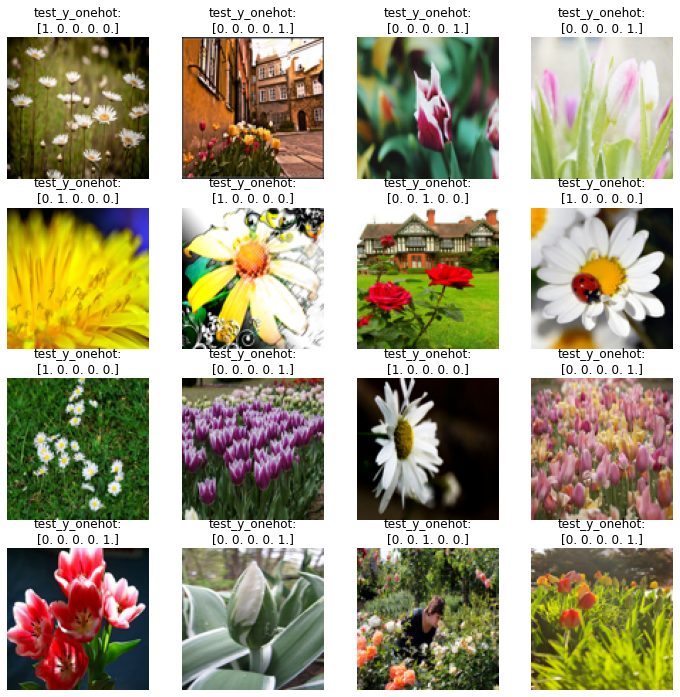

In [30]:
plt.figure(figsize=(12,12))

for i in range(16):
    plt.subplot(4,4,i+1)
    i = np.random.choice(4317)
    img = xs[i]
    img_image = Image.fromarray(np.uint8(img))
    
    plt.title("test_y_onehot:\n{}".format(ys[i]))
    
    plt.axis('off')
    plt.imshow(img_image)
    
plt.show()

In [31]:
print("xs.max() : ", xs.max())
print("xs.min() : ", xs.min())

xs.max() :  255.0
xs.min() :  0.0


In [32]:
xs_norm = xs / 255.0
print("xs_norm.max() : ", xs_norm.max())
print("xs_norm.min() : ", xs_norm.min())

xs_norm.max() :  1.0
xs_norm.min() :  0.0


In [33]:
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)
print(len(shuffle_map))
print("shuffle_map : \n ",shuffle_map)

4317
shuffle_map : 
  [2372 2454 4248 ... 1117 2369 2557]


In [34]:
train_ratio = 0.8

test_begin_index = int(xs_norm.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  3453


In [35]:
train_x = xs[shuffle_map[:test_begin_index]]
test_x  = xs[shuffle_map[test_begin_index:]]

train_y = ys[shuffle_map[:test_begin_index]]
test_y  = ys[shuffle_map[test_begin_index:]]

In [36]:
print("train_x.shape : ", train_x.shape)
print("train_y.shape : ", train_y.shape)
print("test_x.shape : ", test_x.shape)
print("test_y.shape : ", test_y.shape)

train_x.shape :  (3453, 100, 100, 3)
train_y.shape :  (3453, 5)
test_x.shape :  (864, 100, 100, 3)
test_y.shape :  (864, 5)


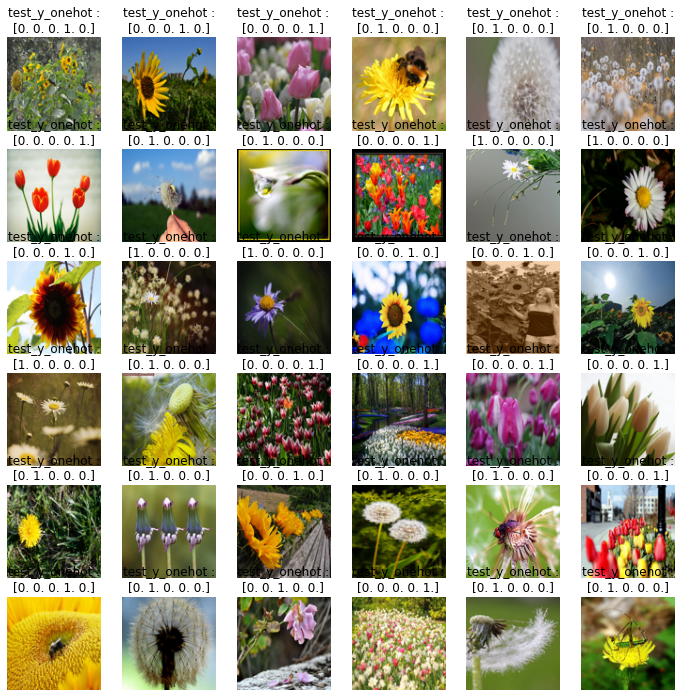

In [37]:
plt.figure(figsize=(12,12))

for i in range(36):
    plt.subplot(6,6,i+1)
    i   = np.random.choice(3453)
    img = train_x[i]
    img_image = Image.fromarray(np.uint8(img))
    
    plt.title("test_y_onehot :\n{}".format(train_y[i]))
    
    plt.axis('off')
    plt.imshow(img_image)
    
plt.show()

In [38]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),
    filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])


In [39]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [40]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
               loss       = 'categorical_crossentropy',
               metrics    = [tf.keras.metrics.TruePositives(name = 'True_positives'),
                            tf.keras.metrics.FalsePositives(name = 'False_positives')])

In [41]:
history = model_1.fit(train_x, train_y,
                     epochs           = 50,
                     validation_split = 0.2,
                     batch_size       = 32)

Epoch 1/50
87/87 [==============================] - 33s 382ms/step - loss: 9.1427 - True_positives: 403.0000 - False_positives: 1029.0000 - val_loss: 1.7564 - val_True_positives: 13.0000 - val_False_positives: 46.0000
Epoch 2/50
87/87 [==============================] - 32s 362ms/step - loss: 1.6530 - True_positives: 92.0000 - False_positives: 127.0000 - val_loss: 1.6859 - val_True_positives: 11.0000 - val_False_positives: 30.0000
Epoch 3/50
87/87 [==============================] - 31s 360ms/step - loss: 1.6064 - True_positives: 94.0000 - False_positives: 93.0000 - val_loss: 1.6740 - val_True_positives: 13.0000 - val_False_positives: 26.0000
Epoch 4/50
87/87 [==============================] - 31s 361ms/step - loss: 1.5347 - True_positives: 138.0000 - False_positives: 69.0000 - val_loss: 1.6031 - val_True_positives: 34.0000 - val_False_positives: 42.0000
Epoch 5/50
87/87 [==============================] - 34s 391ms/step - loss: 1.4972 - True_positives: 204.0000 - False_positives: 112.000

In [42]:
model_1.save('flowers_model_1.h5')

In [43]:
model_1.evaluate(test_x, test_y)

27/27 [==============================] - 2s 57ms/step - loss: 1.5295 - True_positives: 315.0000 - False_positives: 186.0000


[1.5295310020446777, 315.0, 186.0]

In [44]:
print(test_x)

[[[[214. 166. 140.]
   [217. 168. 141.]
   [220. 170. 143.]
   ...
   [ 37.  29.   0.]
   [ 35.  27.   0.]
   [ 35.  27.   0.]]

  [[213. 166. 142.]
   [211. 165. 142.]
   [213. 167. 143.]
   ...
   [ 39.  30.   1.]
   [ 37.  28.   0.]
   [ 36.  28.   0.]]

  [[212. 165. 142.]
   [207. 165. 142.]
   [206. 164. 143.]
   ...
   [ 42.  31.   1.]
   [ 38.  28.   1.]
   [ 37.  27.   0.]]

  ...

  [[ 92.  62.  34.]
   [ 80.  54.  29.]
   [ 67.  45.  23.]
   ...
   [151. 112.  98.]
   [148. 112.  99.]
   [146. 112. 101.]]

  [[ 97.  66.  38.]
   [ 80.  54.  30.]
   [ 68.  47.  23.]
   ...
   [156. 115.  98.]
   [152. 113.  98.]
   [149. 112. 101.]]

  [[111.  75.  45.]
   [ 91.  61.  34.]
   [ 73.  49.  27.]
   ...
   [162. 117.  98.]
   [157. 115.  99.]
   [154. 113.  99.]]]


 [[[ 80. 114.  49.]
   [ 79. 105.  57.]
   [ 46.  63.  28.]
   ...
   [142. 171. 112.]
   [140. 169. 103.]
   [133. 164.  96.]]

  [[ 21.  41.   6.]
   [ 15.  30.   5.]
   [ 24.  37.   4.]
   ...
   [152. 180. 126.]
 

In [45]:
pred_y = model_1.predict(test_x)

In [46]:
print(np.round(pred_y, 3))

[[0.129 0.028 0.3   0.217 0.325]
 [0.04  0.036 0.249 0.454 0.221]
 [0.002 0.    0.598 0.    0.399]
 ...
 [0.55  0.042 0.055 0.029 0.324]
 [0.255 0.201 0.221 0.192 0.131]
 [0.026 0.    0.507 0.003 0.464]]


pred_y_0 -> 4
test_y_0 -> 1
Prob: [0.129 0.028 0.3   0.217 0.325]


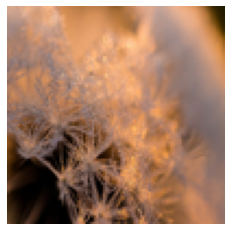

In [47]:
test_index = 0

print("pred_y_{} -> {}".format(test_index, np.argmax(pred_y[test_index])))
print("test_y_{} -> {}".format(test_index, np.argmax(test_y[test_index])))
print("Prob:", np.round(pred_y[test_index],3))

img = test_x[test_index]
img_image = Image.fromarray(np.uint8(img))
plt.imshow(img_image)
plt.axis('off')
plt.show()

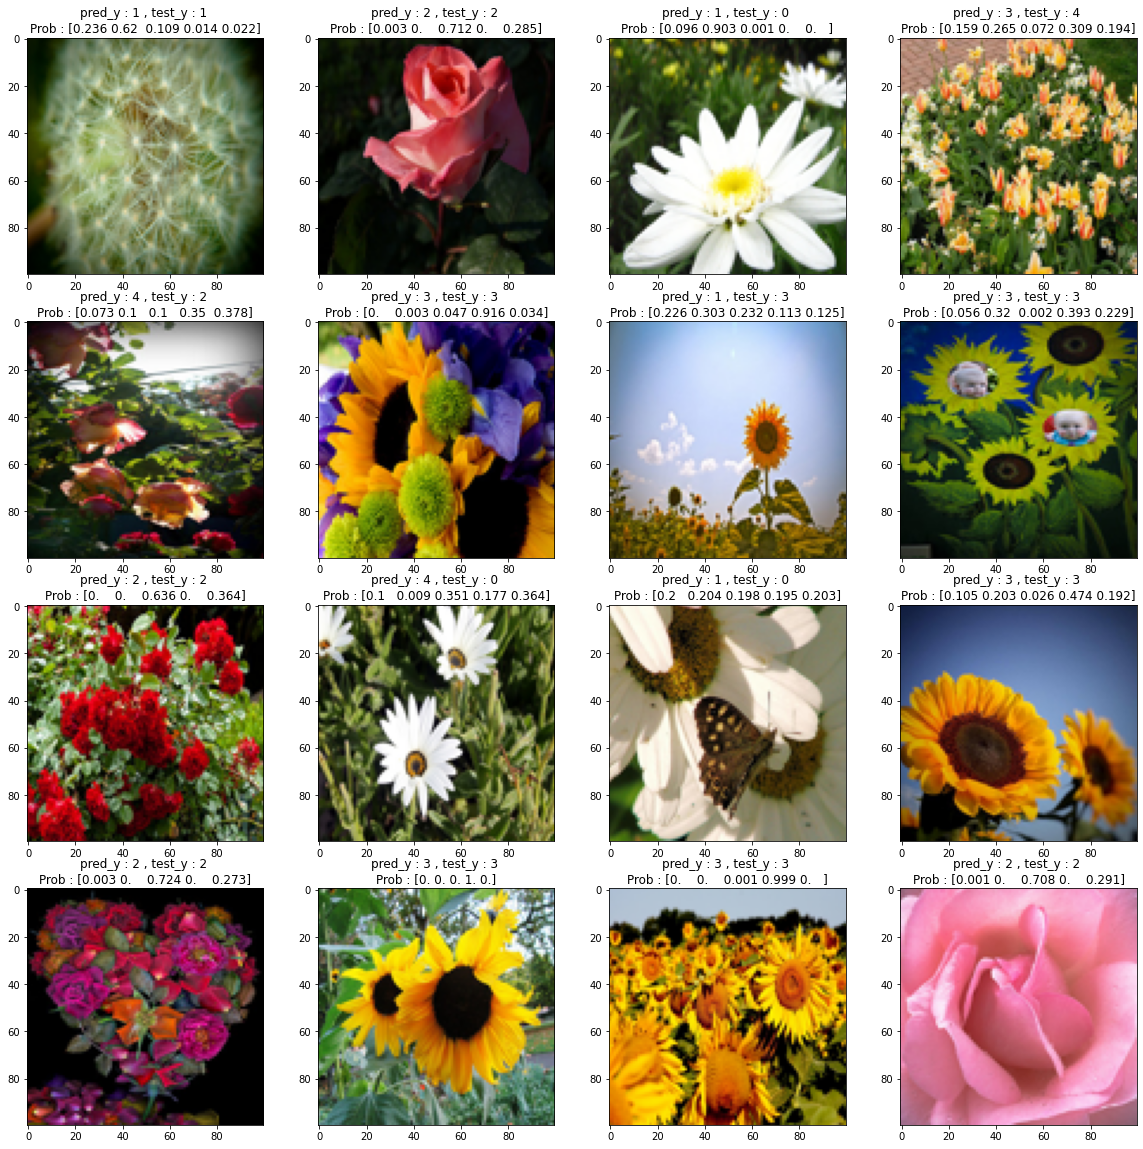

In [48]:
plt.figure(figsize=(20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    
    i = np.random.choice(864)
    img = test_x[i]
    img_Image = Image.fromarray(np.uint8(img))
    plt.imshow(img_Image)
    
    plt.title('pred_y : {} , test_y : {} \nProb : {}'.
              format(np.argmax(pred_y[i]), np.argmax(test_y[i]), np.round(pred_y[i],3)))

plt.draw()